In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('mall_customers.csv')

In [3]:
raw_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
raw_data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
data_2 = raw_data.copy()
data_2 = data_2.drop(['CustomerID'], axis = 1)
data_2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
from sklearn.preprocessing import StandardScaler

col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = data_2[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [7]:
scaled_features = pd.DataFrame(features,columns=col_names)

In [8]:
scaled_features

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980
...,...,...,...
195,2.268791,-0.276302,1.118061
196,2.497807,0.441365,-0.861839
197,2.497807,-0.491602,0.923953
198,2.917671,-0.491602,-1.250054


In [9]:
gender = data_2['Gender']
data_3 = scaled_features.join(gender)

In [10]:
data_3 = pd.get_dummies(data_3)

In [11]:
data_3 = data_3.drop(['Gender_Male'],axis = 1)

#female = 0
#male = 1

In [12]:
data_3

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1
...,...,...,...,...
195,2.268791,-0.276302,1.118061,1
196,2.497807,0.441365,-0.861839,1
197,2.497807,-0.491602,0.923953,0
198,2.917671,-0.491602,-1.250054,0


In [13]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(data_3)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

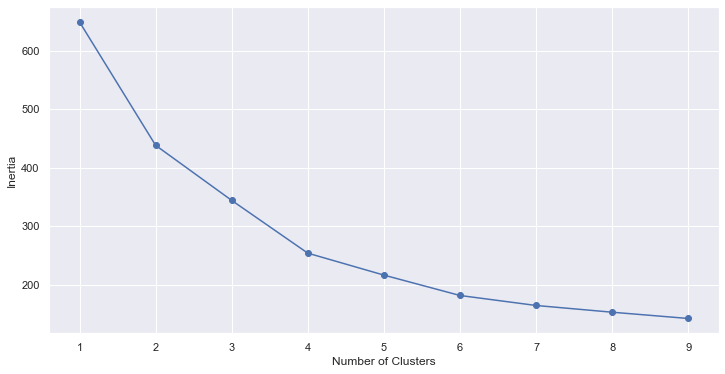

In [14]:
number_of_clusters = range(1,10)

plt.figure(figsize=(12,6))
plt.plot(number_of_clusters,wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [16]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_3)

print(silhouette_score(data_3, kmeans.labels_, metric='euclidean'))

0.35027020434653977


In [18]:
x=data_3.iloc[:,0:5]

In [19]:
kmeans_2 = KMeans(n_clusters = 4)
kmeans_2.fit(x)

KMeans(n_clusters=4)

In [20]:
identified_clusters = kmeans.fit_predict(x)

In [21]:
data_with_clusters = data_3.copy()
data_with_clusters['Cluster'] = identified_clusters

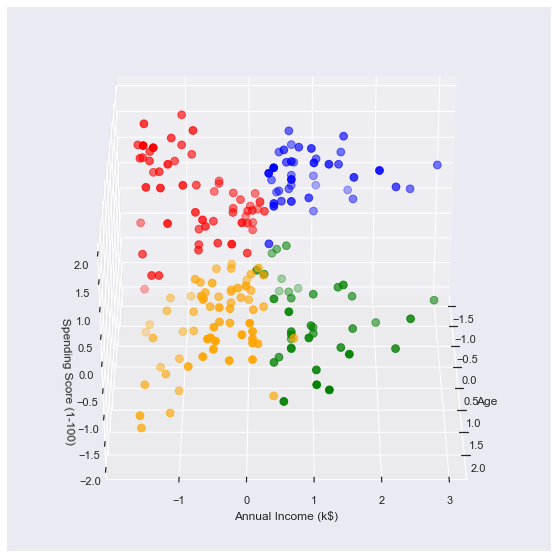

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_with_clusters['Age'][data_with_clusters.Cluster == 0], 
           data_with_clusters["Annual Income (k$)"][data_with_clusters.Cluster == 0], 
           data_with_clusters["Spending Score (1-100)"][data_with_clusters.Cluster == 0], 
           c='blue', s=60)

ax.scatter(data_with_clusters['Age'][data_with_clusters.Cluster == 1], 
           data_with_clusters["Annual Income (k$)"][data_with_clusters.Cluster == 1], 
           data_with_clusters["Spending Score (1-100)"][data_with_clusters.Cluster == 1], 
           c='red', s=60)

ax.scatter(data_with_clusters['Age'][data_with_clusters.Cluster == 2], 
           data_with_clusters["Annual Income (k$)"][data_with_clusters.Cluster == 2], 
           data_with_clusters["Spending Score (1-100)"][data_with_clusters.Cluster == 2], 
           c='green', s=60)

ax.scatter(data_with_clusters['Age'][data_with_clusters.Cluster == 3], 
           data_with_clusters["Annual Income (k$)"][data_with_clusters.Cluster == 3], 
           data_with_clusters["Spending Score (1-100)"][data_with_clusters.Cluster == 3], 
           c='orange', s=60)


ax.view_init(30, 0)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_3)
features = range(pca.n_components)

([<matplotlib.axis.XTick at 0x2bb0b5d8640>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

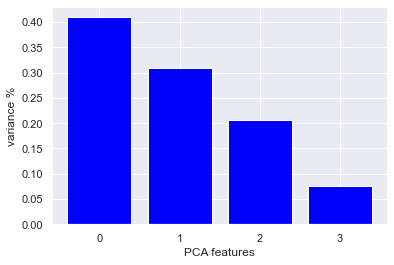

In [26]:
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [27]:
PCA_components = pd.DataFrame(principal_components)


In [28]:
wcss2 = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(PCA_components.iloc[:,:2])
    wcss2_iter = kmeans.inertia_
    wcss2.append(wcss2_iter)
    

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

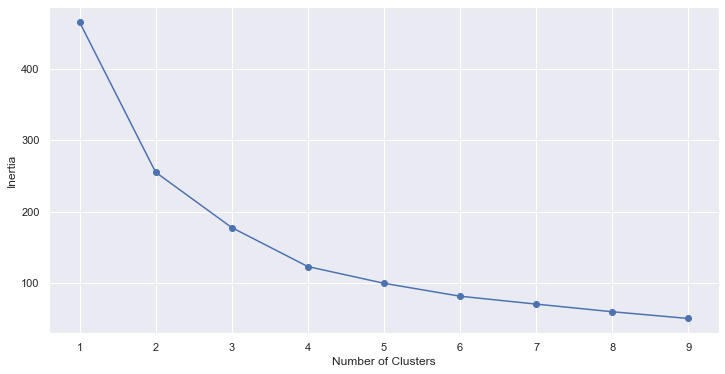

In [29]:
number_of_clusters_2 = range(1,10)

plt.figure(figsize=(12,6))
plt.plot(number_of_clusters_2,wcss2,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [30]:
kmeans_3 = KMeans(n_clusters=4)
kmeans_3.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], kmeans_3.labels_, metric='euclidean'))

0.42177622653948804


In [31]:
novas_clusters = kmeans_3.fit_predict(PCA_components.iloc[:,:2])

In [32]:
data_with_clusters_2 = data_3.copy()

In [33]:
data_with_clusters_2['Cluster'] = novas_clusters

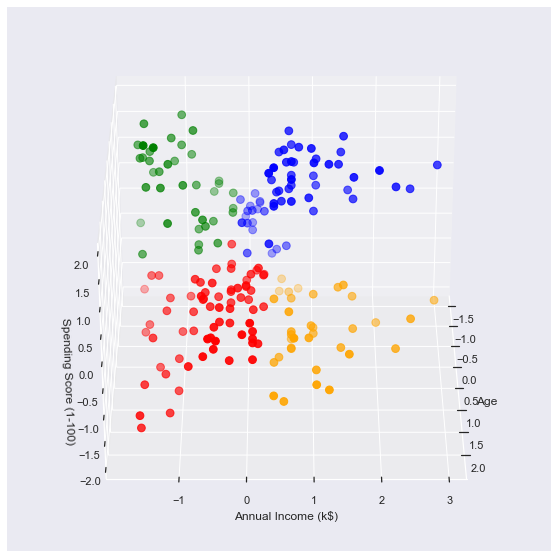

In [34]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_with_clusters_2['Age'][data_with_clusters_2.Cluster == 0], 
           data_with_clusters_2["Annual Income (k$)"][data_with_clusters_2.Cluster == 0], 
           data_with_clusters_2["Spending Score (1-100)"][data_with_clusters_2.Cluster == 0], 
           c='blue', s=60)

ax.scatter(data_with_clusters_2['Age'][data_with_clusters_2.Cluster == 1], 
           data_with_clusters_2["Annual Income (k$)"][data_with_clusters_2.Cluster == 1], 
           data_with_clusters_2["Spending Score (1-100)"][data_with_clusters_2.Cluster == 1], 
           c='red', s=60)

ax.scatter(data_with_clusters_2['Age'][data_with_clusters_2.Cluster == 2], 
           data_with_clusters_2["Annual Income (k$)"][data_with_clusters_2.Cluster == 2], 
           data_with_clusters_2["Spending Score (1-100)"][data_with_clusters_2.Cluster == 2], 
           c='green', s=60)

ax.scatter(data_with_clusters_2['Age'][data_with_clusters_2.Cluster == 3], 
           data_with_clusters_2["Annual Income (k$)"][data_with_clusters_2.Cluster == 3], 
           data_with_clusters_2["Spending Score (1-100)"][data_with_clusters_2.Cluster == 3], 
           c='orange', s=60)


ax.view_init(30,0)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [36]:
analysis_df = pd.read_csv('mall_customers.csv')

In [37]:
analysis_df = analysis_df.drop(['CustomerID'], axis = 1)


In [38]:
analysis_df['cluster'] = novas_clusters

In [39]:
analysis_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,3
197,Male,32,126,74,0
198,Male,32,137,18,3


In [40]:
avg_df = analysis_df.groupby(['cluster'], as_index = False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,30.000000,79.086207,70.775862
1,1,52.144928,46.333333,40.072464
2,2,25.605263,32.631579,67.500000
3,3,41.685714,88.228571,17.285714


In [41]:
median_df = analysis_df.groupby(['cluster'], as_index = False).median()
median_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,30.5,76.0,74.5
1,1,50.0,48.0,46.0
2,2,24.0,33.0,69.0
3,3,43.0,85.0,16.0


<AxesSubplot:xlabel='cluster', ylabel='Age'>

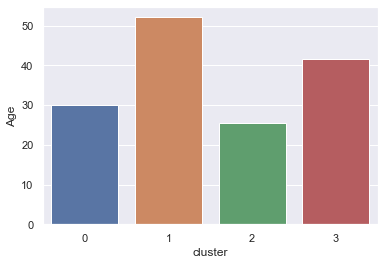

In [42]:
sns.barplot(x='cluster',y='Age',data=avg_df)


<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

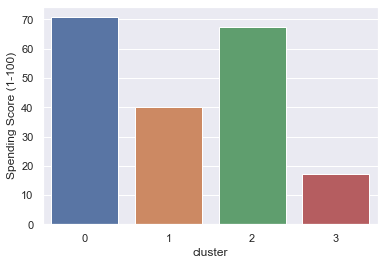

In [43]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

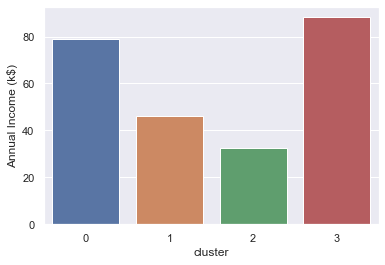

In [44]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [45]:
analysis_df2 = pd.DataFrame(analysis_df.groupby(['cluster','Gender'])['Gender'].count())

In [46]:
analysis_df2

Gender
cluster Gender        
0       Female      34
        Male        24
1       Female      40
        Male        29
2       Female      23
        Male        15
3       Female      15
        Male        20